MSU-USDA Python Workshop

# Python for Data Science: Images and Batch Processing Things

# Images

In this notebook, we'll tackle images since they are so important to computer vision. This will also give us a chance to show how to do batch operations on lots of files.

## I. Importing Libraries

First, let's import the libraries needed for data wrangling, for visualization, and for working with images.


In [1]:
# Import library that helps us deal with the file system and other operating system (os) stuff
import os

# Import our normal pandas and numpy used in wrangling
import numpy as np
import pandas as pd

# These libraries allow us to work with images in matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# This is the pillow library for manipulating images
from PIL import Image, ImageFilter

Matplotlib has an image library that we can use. It is documented here - https://matplotlib.org/stable/api/image_api.html. But we are going to use something more popular - Pillow.

Pillow is documented here: https://pillow.readthedocs.io/en/stable/index.html

## II. Loading an Image

Let's load up an image from your hard drive with Pillow and then view the representation of it.

In [2]:
# open the file and then load it up as an image
with Image.open(r"data/batch_in/Cheetah/cheetah-448901__480.jpg") as cheetah:
    cheetah.load()

# What Type is it?
type(cheetah)
    

PIL.JpegImagePlugin.JpegImageFile

Ah, the image is a JPG; that's good - it matches the file extension (.png).

What can we find out about this image:

In [3]:
# Its format: 
print(cheetah.format)

# Its size:
print(cheetah.size)

# Its color mode:
print(cheetah.mode)

JPEG
(320, 480)
RGB


So, it's (width) 320 x (height) 480. That means it has this many pixels:

In [4]:
print(cheetah.size[0] * cheetah.size[1])

153600


And since the mode is "RGB" that means it is composed of RGB pixels (red, green, blue). If it were RGBA, it would have another value ("A") for level of transparency.

## III. Viewing an Image

Let's view it now in jupyter. 

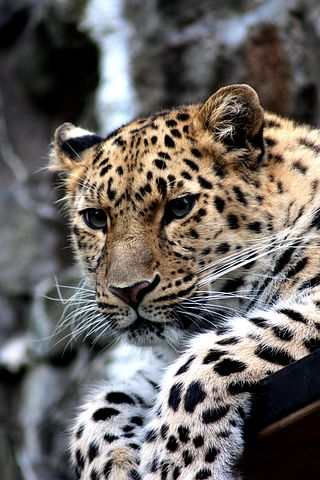

In [4]:
# Jupyter will show it right here
display(cheetah)

## IV. Cropping an Image

Let's crop this image and just get the cheetah's face as an image.

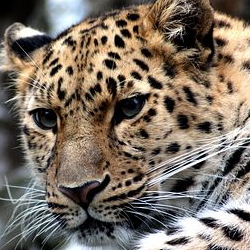

In [7]:
# The .crop() method crops out a box of the image.
# The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate - x,y / x,y
# Documented here: https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop

justTheFace = cheetah.crop((50, 100, 300, 350))
display(justTheFace)

Voila, just the head. The coordinate system assumed by the box we defined above is defined here https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system, but it is easy to remember. The upper lefthand corner of the image is at (0,0) and most programming languages use the convention of x,y (left-right, up-down).

### Exercise 1: Practicing Cropping

Now, let's practice croppping.

(55, 50)


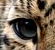

In [10]:
# a. Crop out just the right eye and store in a variable
justTheEye = cheetah.crop((70, 190, 125, 240))

# b. Print the dimensions of your moon image using img attributes
print(justTheEye.size)

# c. Show your cropped moon image in this notebook.
display(justTheEye)

## V. Resizing an Image

Sometimes images can be way too large to work with efficiently. It is common in computer vision work to reduce the size of images significantly.

Let's resize our large Cheetah

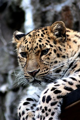

In [11]:
# Let's give Pillow's resize method a tuple that defines the new width and height 
# of the image in pixels and let's get just 1/4 of the full size
cheetahSmall = cheetah.resize((cheetah.width // 4, cheetah.height // 4))
display(cheetahSmall)

Notice that we used the "floor division operator" (//) in Python. Floor division rounds down to nearest integer. For example, the expression 11 // 4 evaluates to 2 in contrast to the 2.75 returned by float true division. The reason? Well, because resolution is in number of pixels and we can't have a fraction of a pixel.

## VI. Saving an Image

Now that we have a lower res image, let's save it and compare the file size. We'll save it as several different image formats. The Pillow library is smart enought to know the format just based on our file extension.

In [13]:
# Save as PNG
cheetahSmall.save("cheetahSmall.png")

# Save as JPG
cheetahSmall.save("cheetahSmall.jpg")


Now look at your directory and compare StarryNightSmall.png to StarryNightSmall.png. 

### Exercise 2: Comparing Image Sizes

Just looking at your file system, answer a few questions about the images we just saved.

In [ ]:
# a. How large (kilobytes) is the cheetahSmall.png?
# 292kb

# b. How large is cheetahSmall.jpg?
# 31kb

# c. Drag each image into a browser window; they should look pretty similar
# they do

# d. What advantage does the .jpg have? 
# smaller file size for pretty much the same appearance


One cool thing about the .jpg format is that you can save it at different quality levels. Run this code:

In [14]:
cheetahSmall.save("cheetahSmall100.jpg", quality=100)
cheetahSmall.save("cheetahSmall80.jpg", quality=80)
cheetahSmall.save("cheetahSmall50.jpg", quality=50)
cheetahSmall.save("cheetahSmall20.jpg", quality=20)

In [32]:
# e. Which quality level takes up the most disk space?
# 100

# f. Compare the quality 100 to quality 20 - what's the difference?
# quality 20 is very blurry / swishy


## VII. Transposing Images

Can I flip it? Yes you can.

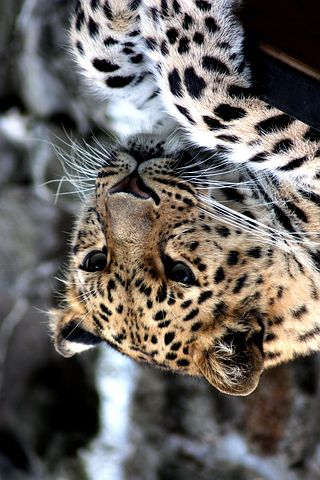

In [15]:
cheetahFlipped = cheetah.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

display(cheetahFlipped)

The Image.Transpose options are:
        
- Image.Tranpose.FLIP_LEFT_RIGHT: Flips the image left to right, resulting in a mirror image
- Image.Tranpose.FLIP_TOP_BOTTOM: Flips the image top to bottom
- Image.Tranpose.ROTATE_90: Rotates the image by 90 degrees counterclockwise
- Image.Tranpose.ROTATE_180: Rotates the image by 180 degrees
- Image.Tranpose.ROTATE_270: Rotates the image by 270 degrees counterclockwise, which is the same as 90 degrees clockwise
- Image.Tranpose.TRANSPOSE: Transposes the rows and columns using the top-left pixel as the origin, with the top-left pixel being the same in the transposed image as in the original image
- Image.Tranpose.TRANSVERSE: Transposes the rows and columns using the bottom-left pixel as the origin, with the bottom-left pixel being the one that remains fixed between the original and modified versions

For example, we can rotate it 90 degrees:

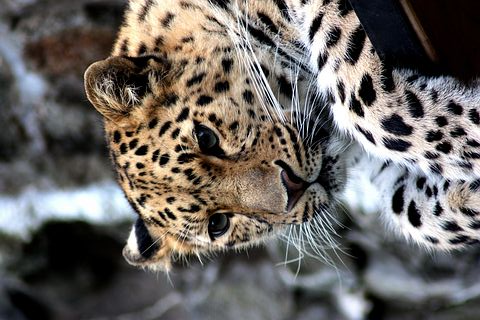

In [16]:
cheetahRotated = cheetah.transpose(Image.Transpose.ROTATE_90)

display(cheetahRotated)

You can also arbitrarily rotate it by any angle:

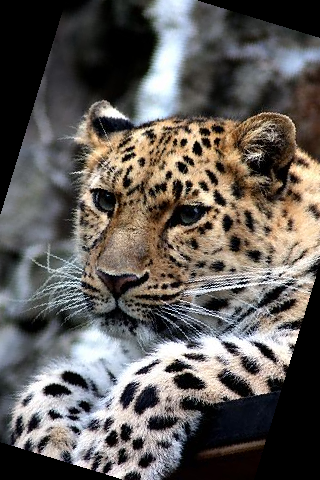

In [17]:
cheetahRotatedNegative17 = cheetah.rotate(-17)

display(cheetahRotatedNegative17)

You can see that we ended up cutting off the corners. We need to give pillow the permission to make the image larger:

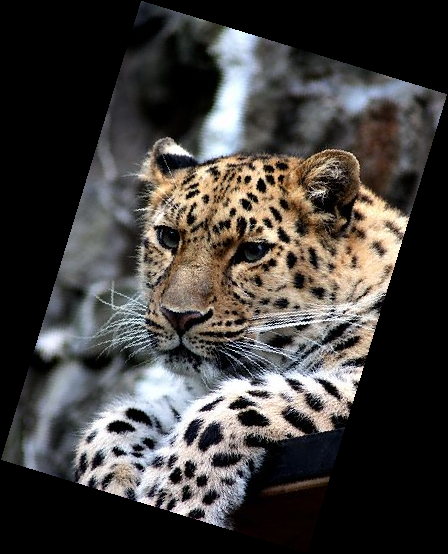

In [18]:
cheetahRotatedNegative17 = cheetah.rotate(-17, expand=True)
display(cheetahRotatedNegative17)

## VIII. Changing the Color Scale

Let's make our image into a greyscale image.


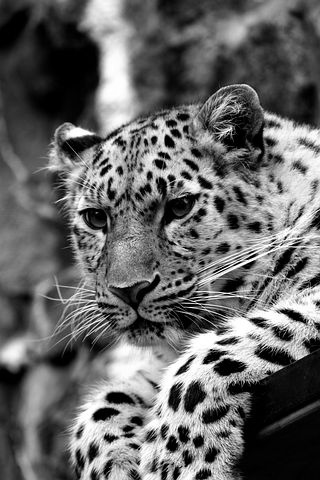

In [19]:
grayCheetah = cheetah.convert("L")
display(grayCheetah)


Converting, in this case, was from RGB to L.

## IX. Smoothing / Sharpening / Blurring

You can also transform images just like you could in Photoshop.

The .Filter() supports:

- BLUR
- CONTOUR
- DETAIL
- EDGE_ENHANCE
- EDGE_ENHANCE_MORE
- EMBOSS
- FIND_EDGES
- SHARPEN
- SMOOTH
- SMOOTH_MORE

Let's sharpen the small image we made earlier:

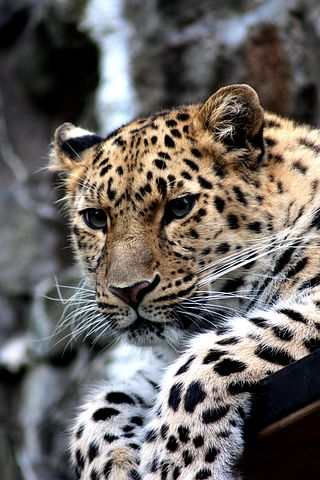

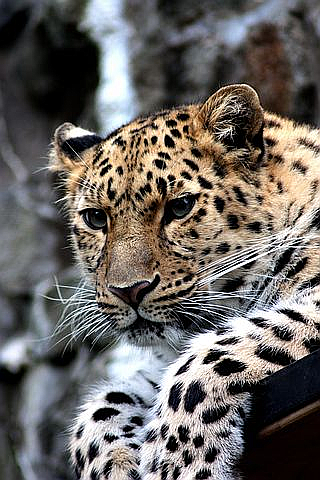

In [20]:
# show what we started with
display(cheetah)

# sharpen it
sharperCheetah = cheetah.filter(ImageFilter.SHARPEN)

# Show the after
display(sharperCheetah)

Most of the time, when you reduce the size of an image you'll need to do some sharpening. The resize also supports various ways to 'interpolate' an image - a strategy for how to handle going from, in our case, 4 pixels to 1.

Enhancing edges can be useful in preparing images for computer vision.

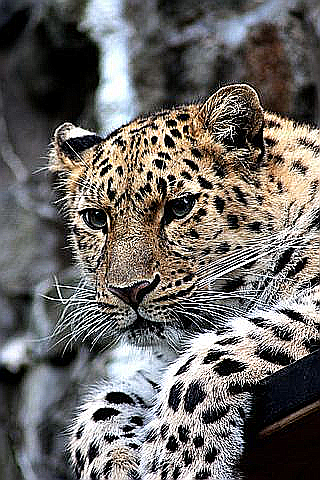

In [21]:
# find edges and show
cheetahEdges = cheetah.filter(ImageFilter.EDGE_ENHANCE)
display(cheetahEdges)

## X. Batch Processing of Images

Often, in a machine learning project, you'll need to batch process files, especially images.

In the data/batch_in/Cheetah directory are several images of cheetahs. Let's process them in batch.


In [5]:
# where to read them from
inputImagePath = r"data/batch_in/Cheetah"

# where to save them
# be sure you create this output directory
outputImagePath = r"data/batch_out/Cheetah"

# let's scale them down by 75% (divide by four)
resizeAmount = 4

# open up the source directory
with os.scandir(inputImagePath) as fileList:
    # loop through all the files in the filelist
    for entry in fileList:
        # if the file is a jpg, then..
        if (entry.name.endswith(".jpg") or entry.name.endswith(".jpeg")) and entry.is_file():
            # open it
            with Image.open(entry.path) as bigImage:
                # resize it using the .thumbnail method
                bigImage.thumbnail((bigImage.width // resizeAmount,bigImage.height // resizeAmount))
                # create a new name out of the old name
                newName = outputImagePath + "/" + entry.name
                # save the resized image as a JPEG at quality 100
                # notice we used a slightly different method for saving here than above
                bigImage.save(newName, "JPEG", quality=100)
                # give some feedback to ourselves so we can see what was processed
                print(f"processing file {entry.name} ..done")


processing file cheetahs-171315__340.jpg ..done
processing file pexels-photo-1320427.jpeg ..done
processing file cheetah-864747__340.jpg ..done
processing file pexels-photo-7018141.jpeg ..done
processing file cheetah-322310__340.jpg ..done
processing file pexels-photo.jpg ..done
processing file cheetah-448901__480.jpg ..done
processing file animal-africa-wilderness-zoo.jpg ..done
processing file pexels-photo-4577569.jpeg ..done
processing file pexels-photo-1109898.jpeg ..done
processing file cheetahs-cubs-two-together-162318.jpeg ..done
processing file cheetah-425468__340.jpg ..done
processing file pexels-photo-624041.jpeg ..done
processing file pexels-photo-2274018.jpeg ..done
processing file namibia-84246__340.jpg ..done
processing file cheetah-4096056__340.jpg ..done
processing file cheetah-223734__340.jpg ..done
processing file cheetah-5689878__340.jpg ..done
processing file pexels-photo-88234.jpeg ..done
processing file cheetah-3475778__340.jpg ..done
processing file cheetahs-5689

Nice, right? Your data/batch_out/Cheetah directory should be full of images now.

Doesn't it feel powerful to do so many things automatically?

### Exercise 3: Putting it all Together

In this exercise you will batch process some Jaguar images to get them ready for machine learning. You'll be able to practice several image manipulation methods and the use of functions.

In [29]:
# Write the code to batch process these and save in data/batch_out/Jaguar

# 1. Write a function that takes a Pillow image and
#    a. flips the original image
#    b. resize the new combined image by half
#    c. sharpens the resized image

def processImage(fullImage):
    flipped = fullImage.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    small = flipped.resize((fullImage.width // 2, fullImage.height // 2))
    sharper = small.filter(ImageFilter.SHARPEN)
    return sharper

# 2. Loop through all the images in the data/batch_in/Jaguar directory and
#    a. call your function to get a transformed version
#    b. save the transformed image to data/batch_out/Jaguar
#       Use quality level 80 for the jpgs.
#    c. provide feedback to the user as each file is processing.

# where to read them from
inputImagePath = "data/batch_in/Jaguar"

# where to save them
outputImagePath = "data/batch_out/Jaguar"

with os.scandir(inputImagePath) as fileList:
    # loop through all the files in the filelist
    for entry in fileList:
        # if the file is a jpg, then..
         if (entry.name.endswith(".jpg") or entry.name.endswith(".jpeg")) and entry.is_file():
            # open it
            with Image.open(entry.path) as bigImage:  
                newImage = processImage(bigImage)
                newName = outputImagePath + "/" + entry.name
                newImage.save(newName, "JPEG", quality=80)
                print(f"processing file {entry.name}... done")
    

processing file photo-1541893321-dcc3e4dcb6dc.jpg... done
processing file jaguar-859412__340.jpg... done
processing file photo-1614371611363-bbce32167c6c.jpg... done
processing file photo-1584313452299-86bbb3f16eca.jpg... done
processing file animal-2607__340.jpg... done
processing file photo-1584307228520-94ee423187ed.jpg... done
processing file photo-1477949775154-d739b82400b3.jpg... done
processing file pexels-photo-4468189.jpeg... done
processing file pexels-photo-5899760.jpeg... done
processing file jaguar-2188660__340.jpg... done
processing file photo-1469367498026-54a83d222f12.jpg... done
processing file jaguar-1337201__340.jpg... done
processing file pexels-photo-7124473.jpeg... done
processing file pexels-photo-155164.jpeg... done
processing file photo-1584313453147-be9beeb8504f.jpg... done
processing file pexels-photo-8562894.jpeg... done
processing file photo-1577053711673-cdf8e87a38e5.jpg... done
processing file photo-1528238344097-a8994f7c74e4.jpg... done
processing file p

## X. Further Thoughts

Sometimes, for machine vision projects, the data scientist will make many versions of the same image by cropping it randomly, rotating randomly, desaturating it, changing colors, etc. This way you end up with more training data to build a model that generalizes against many different ways in which an object appears in an image.